# MIS710 - Machine Learning In Business

**Name:** Kush Sharma
    
**Student ID:** s223581218

**Email:** s223581218@deakin.edu.au

**Course:** S777 - Masters of Data Science

**Assignment 1** Case Study (Business Report) – Individual


**Loading the Dataset**

First we start with loading the dataset provided ("JMG_data.csv") into a Pandas DataFrame.

We'll also display the first few rows and get an overview of the data structure.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("JMG_data.csv")

# Display the first 5 rows
print(data.head())

# Get information about the columns and their data types
print(data.info())

     CarID  Listed_Price               Listed_Date       Make           Model  \
0  1246014         13987  2021-04-24T09:23:15-0500  chevrolet  silverado 1500   
1   692370          2800  2021-04-15T22:07:43-0400     toyota         4runner   
2   242958          1750  2021-05-02T13:02:12-0600       ford  escape xlt awd   
3   310455          9200  2021-04-12T12:20:38-0400      dodge         journey   
4   800040          9900  2021-04-30T13:36:13-0400     toyota        rav4 awd   

   Year Vehicle_Type       Size   Color Transmission Fuel_Type Drive  \
0  2007        truck   mid-size     red    automatic       gas   rwd   
1  1999          SUV  full-size  silver    automatic       gas   rwd   
2  2003          SUV   mid-size    grey    automatic       gas   4wd   
3  2015          SUV  full-size   white    automatic       gas   fwd   
4  2010          SUV   mid-size    grey    automatic       gas   4wd   

   Cylinders  Odometer  Condition Title_Status State                Region  
0  

The dataset has 62,946 cas listings.
There are 18 columns in total. There are missing values in the Cylinders and Region columns

Based on the initial data exploration, we need to clean and preprocess the data to handle missing values and inconsistencies. This will ensure that our data is ready for further analysis and machine learning model development.

**Data Cleaning and Preprocessing**

We will address missing values in the `Cylinders` and `Region` columns, check for inconsistencies in categorical columns,
and convert the `Listed_Date` column to datetime format.

In [ ]:
# Checking for missing values
print(data.isnull().sum())

CarID             0
Listed_Price      0
Listed_Date       0
Make              0
Model             0
Year              0
Vehicle_Type      0
Size              0
Color             0
Transmission      0
Fuel_Type         0
Drive             0
Cylinders       374
Odometer          0
Condition         0
Title_Status      0
State             0
Region          301
dtype: int64


In [ ]:
# Imputing missing values for 'Cylinders' with the median
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].median())

# Imputing missing values for 'Region' with the most frequent value
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])

# Verifying that there are no more missing values
print(data.isnull().sum())

CarID           0
Listed_Price    0
Listed_Date     0
Make            0
Model           0
Year            0
Vehicle_Type    0
Size            0
Color           0
Transmission    0
Fuel_Type       0
Drive           0
Cylinders       0
Odometer        0
Condition       0
Title_Status    0
State           0
Region          0
dtype: int64


In [ ]:
# Get all categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Check the number of unique values in each categorical column
for col in categorical_cols:
    print(f"Column '{col}': {data[col].nunique()} unique values")

Column 'Listed_Date': 61228 unique values
Column 'Make': 40 unique values
Column 'Model': 8420 unique values
Column 'Vehicle_Type': 13 unique values
Column 'Size': 4 unique values
Column 'Color': 12 unique values
Column 'Transmission': 2 unique values
Column 'Fuel_Type': 5 unique values
Column 'Drive': 3 unique values
Column 'Condition': 6 unique values
Column 'Title_Status': 6 unique values
Column 'State': 51 unique values
Column 'Region': 403 unique values


In [ ]:
# Get unique values in 'Make'
unique_makes = data['Make'].unique()

# Print unique values in 'Make'
print("Unique values in 'Make':")
print(unique_makes)

Unique values in 'Make':
['chevrolet' 'toyota' 'ford' 'dodge' 'subaru' 'hyundai' 'honda'
 'mitsubishi' 'bmw' 'volkswagen' 'gmc' 'chrysler' 'cadillac' 'lincoln'
 'saturn' 'nissan' 'acura' 'audi' 'rover' 'volvo' 'infiniti' 'lexus' 'ram'
 'mazda' 'mercedes-benz' 'mercury' 'kia' 'jaguar' 'mini' 'buick' 'fiat'
 'jeep' 'pontiac' 'porsche' 'alfa-romeo' 'harley-davidson' 'datsun'
 'ferrari' 'aston-martin' 'land rover']


In [ ]:
# Get unique values in 'State'
unique_states = data['State'].unique()

# Print unique values in 'State'
print("Unique values in 'State':")
print(unique_states)

Unique values in 'State':
['wi' 'nc' 'co' 'fl' 'ny' 'mi' 'nm' 'id' 'tn' 'va' 'nj' 'pa' 'ca' 'nh'
 'ak' 'ri' 'ky' 'tx' 'oh' 'ok' 'il' 'ma' 'mn' 'az' 'vt' 'in' 'mt' 'ms'
 'sc' 'me' 'md' 'wa' 'or' 'hi' 'ct' 'sd' 'al' 'ks' 'ia' 'ga' 'dc' 'mo'
 'ar' 'ne' 'ut' 'nv' 'wy' 'la' 'de' 'nd' 'wv']


In [ ]:
# Standard set of US state abbreviations
us_states = {'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
             'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
             'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
             'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
             'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'DC'}

# Convert the state abbreviations in the dataset to uppercase for comparison
data['State'] = data['State'].str.upper()

# Find any state abbreviations in the dataset that are not in the standard set
invalid_states = set(data['State'].unique()) - us_states

# Print the invalid states
if invalid_states:
    print("Invalid state abbreviations found:", invalid_states)
else:
    print("All state abbreviations are valid.")

All state abbreviations are valid.


In [ ]:
# Get unique values in 'Region'
unique_regions = data['Region'].unique()

# Print the number of unique regions
print("Number of unique values in 'Region':", len(unique_regions))

# If the number of unique regions is manageable, print the unique values
if len(unique_regions) <= 50:  # You can adjust this threshold
    print("Unique values in 'Region':")
    print(unique_regions)
else:
    print("Too many unique values in 'Region' to display.")

Number of unique values in 'Region': 403
Too many unique values in 'Region' to display.


In [ ]:
# Function to clean region names
def clean_region(region):
    # Remove state abbreviations (e.g., " - NY")
    region = region.split(' - ')[0]
    # Remove any trailing or leading whitespace
    region = region.strip()
    return region

# Apply the cleaning function to the 'Region' column
data['Region'] = data['Region'].apply(clean_region)

# Get unique values in 'Region' after cleaning
unique_regions_cleaned = data['Region'].unique()

# Print the number of unique regions after cleaning
print("Number of unique values in 'Region' after cleaning:", len(unique_regions_cleaned))

# If the number of unique regions is manageable, print the unique values
if len(unique_regions_cleaned) <= 50:  # You can adjust this threshold
    print("Unique values in 'Region' after cleaning:")
    print(unique_regions_cleaned)
else:
    print("Too many unique values in 'Region' to display.")

Number of unique values in 'Region' after cleaning: 403
Too many unique values in 'Region' to display.


In [ ]:
# Get the top 50 most frequent regions
top_50_regions = data['Region'].value_counts().head(50).index.tolist()

# Print the top 50 regions
print("Top 50 most frequent regions:")
print(top_50_regions)

Top 50 most frequent regions:
['columbus', 'vermont', 'jacksonville', 'minneapolis / st paul', 'detroit metro', 'albany', 'tulsa', 'reno / tahoe', 'kansas city, MO', 'cleveland', 'philadelphia', 'central NJ', 'grand rapids', 'boston', 'raleigh / durham / CH', 'charlotte', 'pittsburgh', 'greenville / upstate', 'boise', 'rochester', 'nashville', 'madison', 'maine', 'fresno / madera', 'oklahoma city', 'rhode island', 'phoenix', 'orange county', 'cincinnati', 'louisville', 'atlanta', 'anchorage / mat-su', 'tampa bay area', 'indianapolis', 'omaha / council bluffs', 'denver', 'new hampshire', 'stockton', 'knoxville', 'des moines', 'ventura county', 'dallas / fort worth', 'south florida', 'new york city', 'south jersey', 'colorado springs', 'milwaukee', 'north jersey', 'san diego', 'los angeles']


In [ ]:
# Convert 'Listed_Date' to datetime format
data['Listed_Date'] = pd.to_datetime(data['Listed_Date'])

# Verify the data type conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62946 entries, 0 to 62945
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarID         62946 non-null  int64  
 1   Listed_Price  62946 non-null  int64  
 2   Listed_Date   62946 non-null  object 
 3   Make          62946 non-null  object 
 4   Model         62946 non-null  object 
 5   Year          62946 non-null  int64  
 6   Vehicle_Type  62946 non-null  object 
 7   Size          62946 non-null  object 
 8   Color         62946 non-null  object 
 9   Transmission  62946 non-null  object 
 10  Fuel_Type     62946 non-null  object 
 11  Drive         62946 non-null  object 
 12  Cylinders     62946 non-null  float64
 13  Odometer      62946 non-null  int64  
 14  Condition     62946 non-null  object 
 15  Title_Status  62946 non-null  object 
 16  State         62946 non-null  object 
 17  Region        62946 non-null  object 
dtypes: float64(1), int64(4), o

<ipython-input-12-e50e7f03a215>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Listed_Date'] = pd.to_datetime(data['Listed_Date'])


In [ ]:
# Convert 'Listed_Date' to datetime format with utc=True
data['Listed_Date'] = pd.to_datetime(data['Listed_Date'], utc=True)

# Verify the data type conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62946 entries, 0 to 62945
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   CarID         62946 non-null  int64              
 1   Listed_Price  62946 non-null  int64              
 2   Listed_Date   62946 non-null  datetime64[ns, UTC]
 3   Make          62946 non-null  object             
 4   Model         62946 non-null  object             
 5   Year          62946 non-null  int64              
 6   Vehicle_Type  62946 non-null  object             
 7   Size          62946 non-null  object             
 8   Color         62946 non-null  object             
 9   Transmission  62946 non-null  object             
 10  Fuel_Type     62946 non-null  object             
 11  Drive         62946 non-null  object             
 12  Cylinders     62946 non-null  float64            
 13  Odometer      62946 non-null  int64              
 14  Condit

**Data Cleaning and Preprocessing**

**2.1 Handling Missing Values**

-   Missing values were identified using `data.isnull().sum()`.
-   `Cylinders` were imputed with the median.
-   `Region` were imputed with the mode.
-   Missing values were verified to be handled.

**2.2 Checking for Inconsistencies**

-   Categorical columns were checked for inconsistencies.
-   `Make` and `State` were found to be clean.
-   `Region` cleaning focused on the top 50 frequent regions.
    -   Initial standardization attempts were ineffective.
    -   Top 50 regions were inspected and deemed acceptable.

**2.3 Data Type Conversion**

-   `Listed_Date` was converted to datetime format using `pd.to_datetime(data['Listed_Date'], utc=True)`.
-   Conversion was verified with `data.info()`.

**Exploratory Data Analysis (EDA)**

Now we will perform Exploratory Data Analysis (EDA) to gain insights into the data and answer the client's inquiries. We will use various techniques to visualise and summarise the data, identify patterns, and extract meaningful information.

**Overview of Listed Cars**

The first we need to provide an overview of the listed cars, including key attributes such as make, odometer readings, build year, vehicle type, size, condition, and price.

In [ ]:
# Summarize key attributes

# Get summary statistics for numerical columns
numerical_summary = data[['Listed_Price', 'Odometer', 'Year']].describe()
print("Numerical Summary:")
print(numerical_summary)

# Get value counts for categorical columns
categorical_cols = ['Make', 'Vehicle_Type', 'Size', 'Condition']
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(data[col].value_counts())

Numerical Summary:
       Listed_Price      Odometer          Year
count  62946.000000  6.294600e+04  62946.000000
mean   12972.070410  1.250213e+05   2008.470642
std    11740.560353  2.424812e+05      9.892727
min        0.000000  0.000000e+00   1900.000000
25%     4995.000000  7.404250e+04   2006.000000
50%     9000.000000  1.149170e+05   2011.000000
75%    17500.000000  1.560000e+05   2014.000000
max    75000.000000  1.000000e+07   2022.000000

Value Counts for 'Make':
Make
ford               12412
chevrolet           9584
toyota              5578
honda               3886
nissan              3164
gmc                 2597
jeep                2568
ram                 2267
dodge               1980
bmw                 1698
subaru              1587
mercedes-benz       1454
hyundai             1425
volkswagen          1401
kia                 1109
chrysler            1101
cadillac             969
lexus                956
buick                838
mazda                780
audi              

**Make**: Chevrolet is the most frequent car manufacturer, followed by Ford and Toyota.
**Vehicle_Type**: Sedan and SUV are the most common vehicle types.
**Size**: Full-size vehicles are the most common.
Condition: Most vehicles are in excellent or good condition.

**Car Popularity: Top 10 Most Listed Makes and Models**


To determine the top 10 most listed makes and models, we'll first find the top 10 makes and then the top 10 models.

In [ ]:
# Find the top 10 most listed makes
top_10_makes = data['Make'].value_counts().head(10)
print("Top 10 Most Listed Makes:")
print(top_10_makes)

# Find the top 10 most listed models
top_10_models = data['Model'].value_counts().head(10)
print("\nTop 10 Most Listed Models:")
print(top_10_models)

Top 10 Most Listed Makes:
Make
ford         12412
chevrolet     9584
toyota        5578
honda         3886
nissan        3164
gmc           2597
jeep          2568
ram           2267
dodge         1980
bmw           1698
Name: count, dtype: int64

Top 10 Most Listed Models:
Model
f-150             1307
silverado 1500    1151
1500               713
camry              534
silverado          533
accord             517
civic              458
2500               454
wrangler           426
altima             397
Name: count, dtype: int64


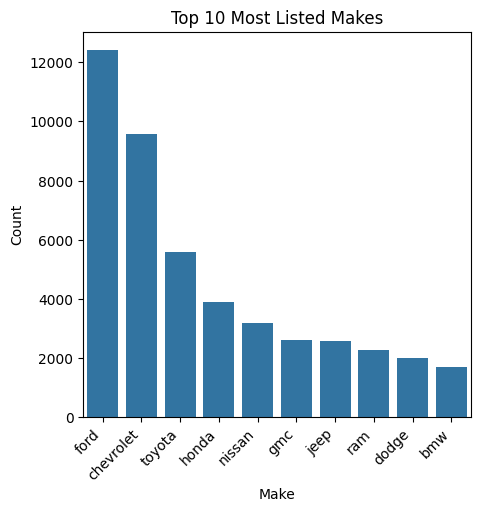

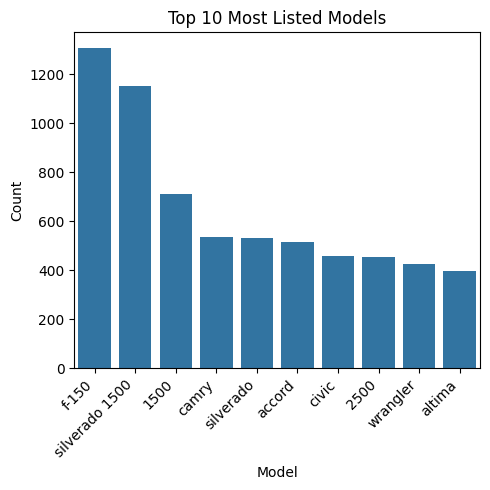

In [ ]:
# Visualise the top 10 makes
plt.figure(figsize=(5, 5))
sns.barplot(x=top_10_makes.index, y=top_10_makes.values)
plt.title('Top 10 Most Listed Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Visualize the top 10 models
plt.figure(figsize=(5, 5))
sns.barplot(x=top_10_models.index, y=top_10_models.values)
plt.title('Top 10 Most Listed Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Price vs. Odometer and Age**

We will now analyse the relationship between price and odometer reading, and price and car age, we can create scatter plots. We'll also calculate the car's age from the Year column.

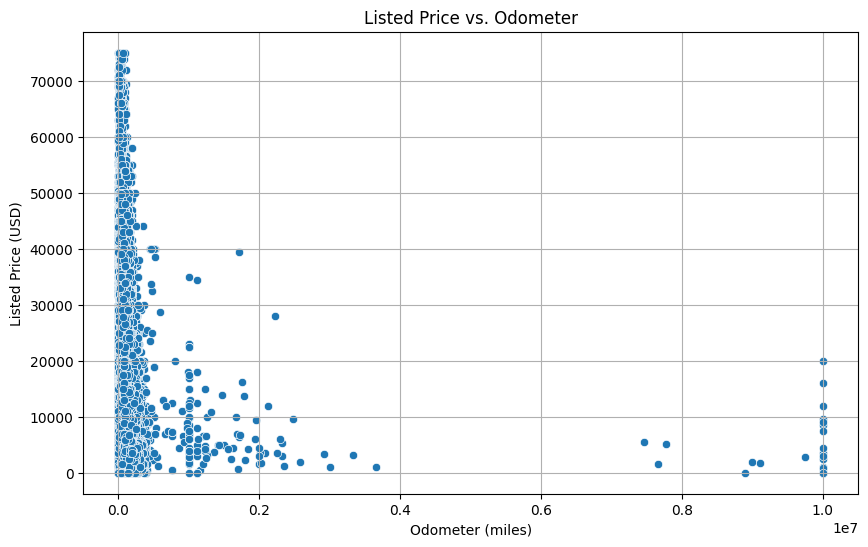

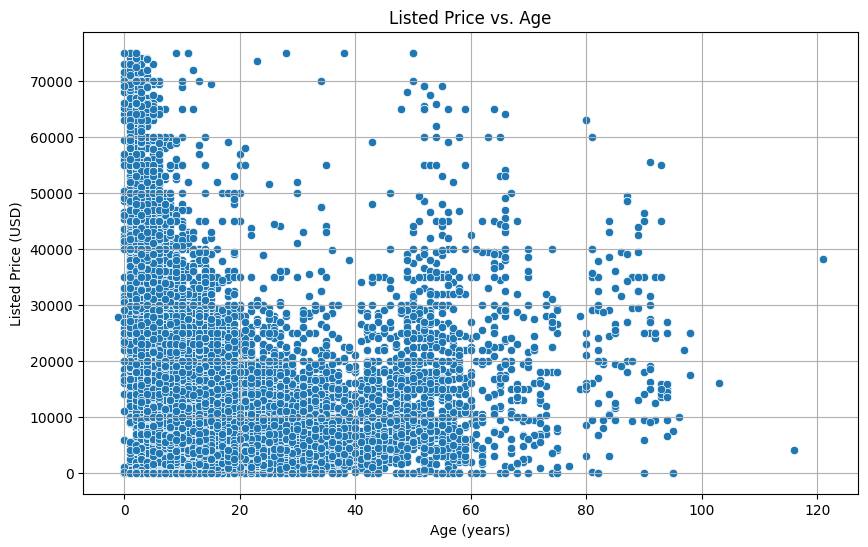

In [ ]:
# Calculate car age
current_year = data['Listed_Date'].dt.year.max()  # Use the latest listed year as the current year
data['Age'] = current_year - data['Year']

# Scatter plot of Price vs. Odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Odometer', y='Listed_Price', data=data)
plt.title('Listed Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Listed Price (USD)')
plt.grid(True)
plt.show()

# Scatter plot of Price vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Listed_Price', data=data)
plt.title('Listed Price vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Listed Price (USD)')
plt.grid(True)
plt.show()

**Listed Price vs. Odometer:**

As we noted before, there's a general trend of decreasing price with increasing odometer readings. Cars with very high mileage tend to have lower listed prices.
The majority of the data points are clustered in the lower odometer ranges, indicating a larger number of listings for cars with relatively lower mileage.
The presence of cars with low mileage but very high prices suggests potential outliers or specialty vehicles.

**Listed Price vs. Age:**

This plot also shows a negative correlation, where older cars generally have lower listed prices. The most rapid decrease in price appears to occur in the first 20-30 years.
There's a denser cluster of listings for younger cars (age less than 20 years), which is expected in the used car market.
Similar to the odometer plot, there are instances of older cars with higher prices, potentially due to classic or collectible status, low mileage for their age, or excellent condition.

**Conclusion:**

Both odometer reading and age are significant factors influencing the listed price of used cars. Generally, lower mileage and younger age correspond to higher prices. However, other factors not visualized here (like make, model, condition, features) also play a crucial role in determining the final price. The outliers in both plots warrant further investigation if we were to build a predictive model.

**Car Price by Selected Features**

The next inquiry from the group is to analyze how listed prices vary across vehicle type, size, condition, and fuel type.

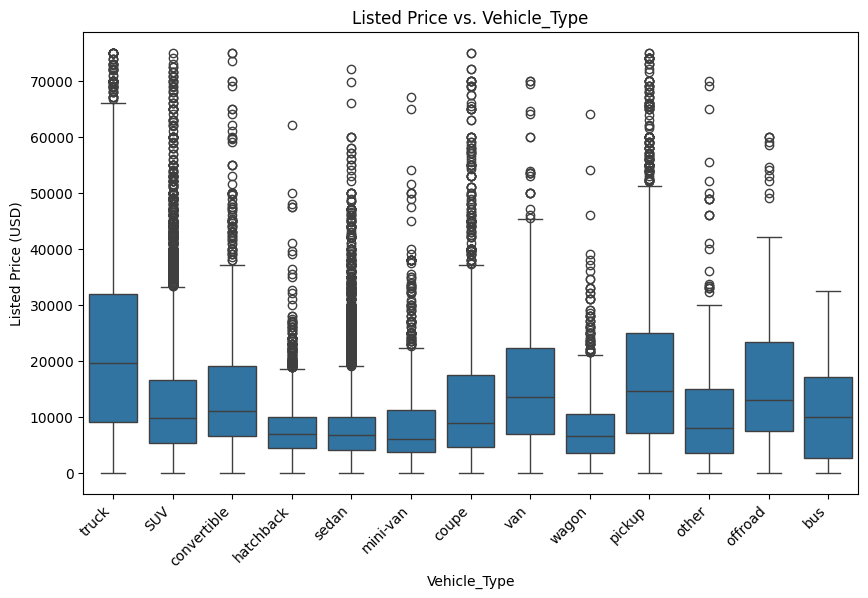

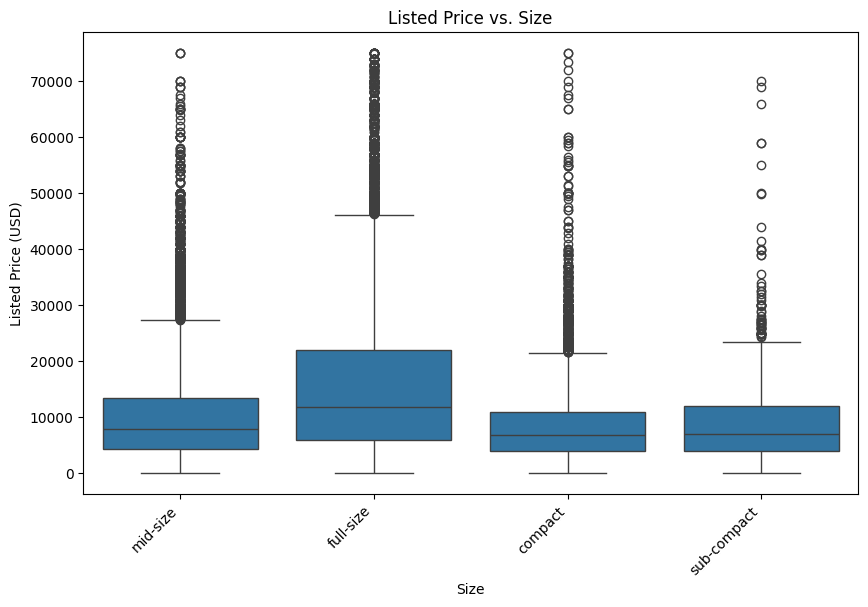

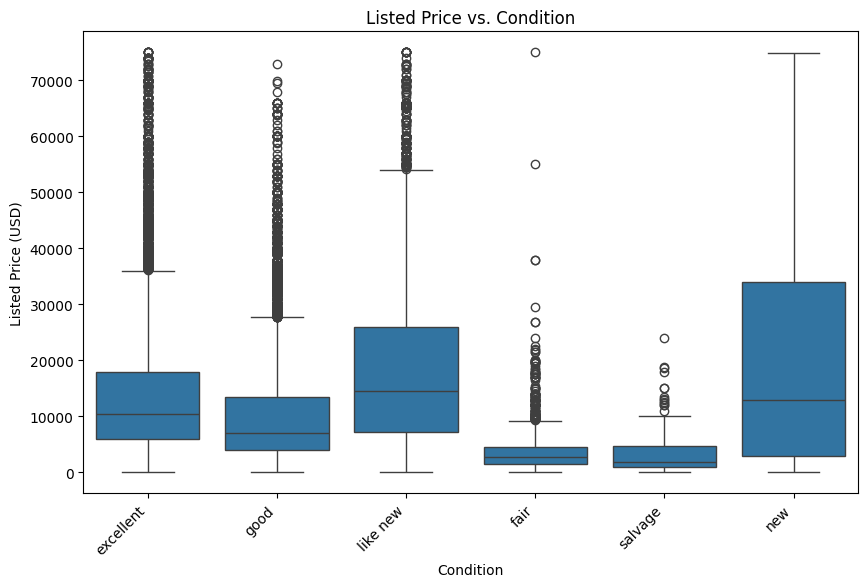

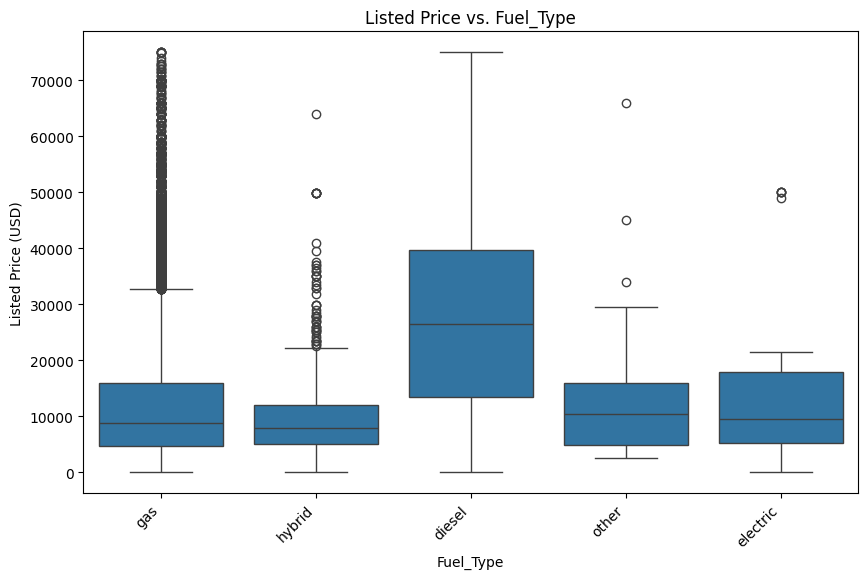

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create box plots to visualize the relationship between price and categorical features
categorical_cols = ['Vehicle_Type', 'Size', 'Condition', 'Fuel_Type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Listed_Price', data=data)
    plt.title(f'Listed Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Listed Price (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

**Summary of Price Variation by Selected Features:**

**Vehicle Type:** Trucks and SUVs tend to be more expensive.

**Size:** Full-size cars generally have higher prices.

**Condition:** Better condition directly correlates with higher prices.

**Fuel Type:** Diesel and electric vehicles tend to have higher prices on average.

Now that we have analyzed how prices vary across these categorical features, the next step is to consider other features that might influence listed prices, as mentioned in inquiry number 5. We should also think about how to prepare our data for building a predictive model, which will likely involve handling these categorical variables.

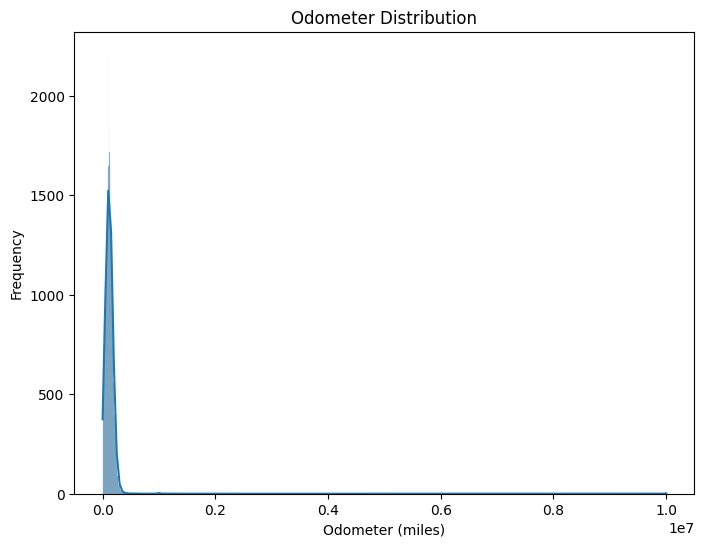

Number of outliers in Odometer: 814


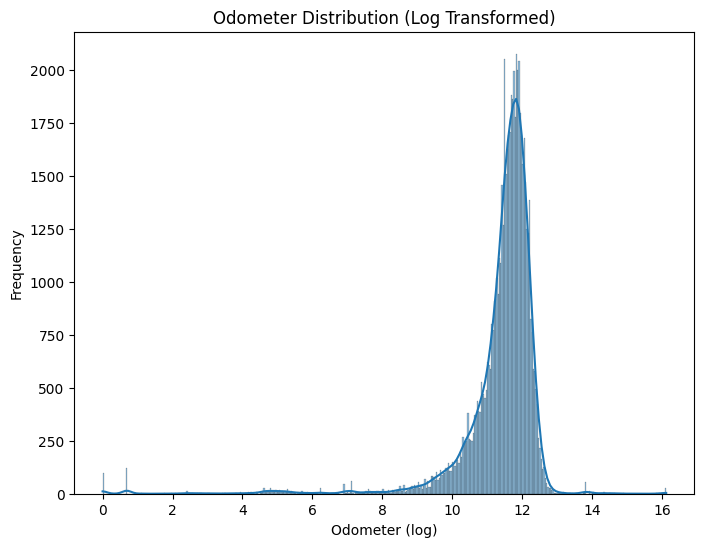

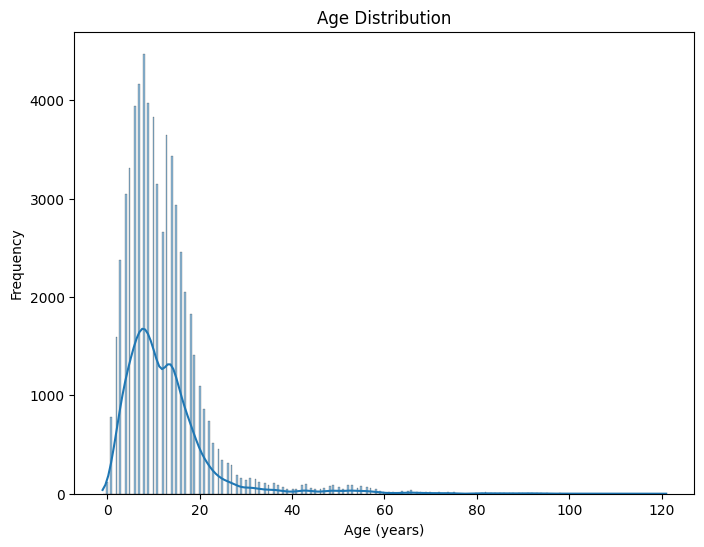

           Odometer  Odometer_log          Year           Age
count  6.294600e+04  62946.000000  62946.000000  62946.000000
mean   1.250213e+05     11.403973   2008.470642     12.529358
std    2.424812e+05      1.175937      9.892727      9.892727
min    0.000000e+00      0.000000   1900.000000     -1.000000
25%    7.404250e+04     11.212408   2006.000000      7.000000
50%    1.149170e+05     11.651974   2011.000000     10.000000
75%    1.560000e+05     11.957618   2014.000000     15.000000
max    1.000000e+07     16.118096   2022.000000    121.000000


In [28]:
import numpy as np

# Handle Odometer: Check for outliers and apply transformation if necessary
plt.figure(figsize=(8, 6))
sns.histplot(data['Odometer'], kde=True)
plt.title('Odometer Distribution')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()

# Calculate IQR for Odometer
Q1 = data['Odometer'].quantile(0.25)
Q3 = data['Odometer'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_odometer = data[(data['Odometer'] < lower_bound) | (data['Odometer'] > upper_bound)]
print(f"Number of outliers in Odometer: {len(outliers_odometer)}")

# Apply log transformation to Odometer to reduce skew
data['Odometer_log'] = np.log1p(data['Odometer'])  # log1p handles 0 values

plt.figure(figsize=(8, 6))
sns.histplot(data['Odometer_log'], kde=True)
plt.title('Odometer Distribution (Log Transformed)')
plt.xlabel('Odometer (log)')
plt.ylabel('Frequency')
plt.show()

# Handle Year: Calculate Age and decide which to use
current_year = data['Listed_Date'].dt.year.max()
data['Age'] = current_year - data['Year']

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

print(data[['Odometer', 'Odometer_log', 'Year', 'Age']].describe())

**Odometer:** The mean (125,021 miles) is higher than the median (114,917 miles), confirming the right skewness. The maximum value is very high (10 million miles), indicating extreme outliers. The log transformation has resulted in a more compressed range and a lower standard deviation, which is generally desirable for modeling.

**Year:** The years range from 1900 to 2022. The mean year is 2008, and the median is 2011, suggesting a slight skew towards older vehicles.

**Age:** The calculated age ranges from -1 to 121 years. A negative age is unusual and likely due to an inconsistency in the Year or Listed_Date. The mean age is 12.5 years, and the median is 10 years, again indicating a right skew. The maximum age of 121 years corresponds to the oldest car from 1900.

In [29]:
# Find the row with Age == -1
incorrect_age_row = data[data['Age'] == -1]
print("Row with incorrect age:")
print(incorrect_age_row)

Row with incorrect age:
        CarID  Listed_Price               Listed_Date        Make  \
23262  501285         27725 2021-04-22 16:55:47+00:00  mitsubishi   

                  Model  Year Vehicle_Type      Size   Color Transmission  \
23262  eclipse cross se  2022          SUV  mid-size  silver    automatic   

      Fuel_Type Drive  Cylinders  Odometer Condition Title_Status State  \
23262    diesel   fwd        4.0         1       new        clean    KS   

                Region  Age  Odometer_log  
23262  kansas city, MO   -1      0.693147  


In [30]:
# Remove the row with Age == -1
data = data[data['Age'] != -1]
print("Data shape after removing incorrect age row:", data.shape)

Data shape after removing incorrect age row: (62945, 20)


In [31]:
# Prepare Numerical Features

# Use Odometer_log and Age

numerical_features = ['Odometer_log', 'Age']
numerical_data = data[numerical_features]

print("Numerical features prepared.")

# Prepare Categorical Features (initial steps)

# Define which columns are categorical
categorical_cols = ['Make', 'Model', 'Vehicle_Type', 'Size', 'Condition',
                      'Fuel_Type', 'Transmission', 'Drive', 'Color', 'Title_Status',
                      'State', 'Region']

# Check the number of unique values in each categorical column
for col in categorical_cols:
    unique_count = data[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Numerical features prepared.
Column 'Make' has 40 unique values.
Column 'Model' has 8419 unique values.
Column 'Vehicle_Type' has 13 unique values.
Column 'Size' has 4 unique values.
Column 'Condition' has 6 unique values.
Column 'Fuel_Type' has 5 unique values.
Column 'Transmission' has 2 unique values.
Column 'Drive' has 3 unique values.
Column 'Color' has 12 unique values.
Column 'Title_Status' has 6 unique values.
Column 'State' has 51 unique values.
Column 'Region' has 403 unique values.


In [32]:
# Prepare Categorical Features

# 1. Handle 'Model'

# Get value counts for 'Model'
model_counts = data['Model'].value_counts()

# Define the number of top models to keep
top_n_models = 50  # You can adjust this number

# Get the list of top N models
top_models = model_counts.head(top_n_models).index.tolist()

# Create a new 'Model_reduced' column
data['Model_reduced'] = data['Model'].apply(lambda x: x if x in top_models else 'Other')

# One-hot encode 'Model_reduced'
model_reduced_encoded = pd.get_dummies(data['Model_reduced'], prefix='Model')
print("Model_reduced one-hot encoded.")

# 2. Handle 'Region'

# Get value counts for 'Region'
region_counts = data['Region'].value_counts()

# Define the number of top regions to keep
top_n_regions = 50  # You can adjust this number

# Get the list of top N regions
top_regions = region_counts.head(top_n_regions).index.tolist()

# Create a new 'Region_reduced' column
data['Region_reduced'] = data['Region'].apply(lambda x: x if x in top_regions else 'Other')

# One-hot encode 'Region_reduced'
region_reduced_encoded = pd.get_dummies(data['Region_reduced'], prefix='Region')
print("Region_reduced one-hot encoded.")

# 3. One-hot encode other categorical columns
other_categorical_cols = ['Make', 'Vehicle_Type', 'Size', 'Condition',
                            'Fuel_Type', 'Transmission', 'Drive', 'Color', 'Title_Status', 'State']

other_encoded_cols = pd.get_dummies(data[other_categorical_cols])
print("Other categorical columns one-hot encoded.")

# Concatenate all encoded columns
categorical_data_encoded = pd.concat([model_reduced_encoded, region_reduced_encoded, other_encoded_cols], axis=1)
print("All categorical features encoded and concatenated.")

# Print the shape of the final categorical data
print("Shape of final categorical data:", categorical_data_encoded.shape)

Model_reduced one-hot encoded.
Region_reduced one-hot encoded.
Other categorical columns one-hot encoded.
All categorical features encoded and concatenated.
Shape of final categorical data: (62945, 244)


In [34]:
# Combine Numerical and Categorical Data

# Concatenate the numerical, encoded categorical dataframes, and 'Listed_Price'
final_data = pd.concat([numerical_data, categorical_data_encoded, data['Listed_Price']], axis=1)

print("Numerical and categorical data combined.")
print("Final data shape:", final_data.shape)

# Build a Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
X = final_data.drop('Listed_Price', axis=1)  # Features (independent variables)
y = final_data['Listed_Price']  # Target variable (dependent variable) - use final_data here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Numerical and categorical data combined.
Final data shape: (62945, 247)

Linear Regression Model Evaluation:
Mean Squared Error: 77295097.76534884
R-squared: 0.44820008132126954


The Linear Regression model, in its current form, has moderate explanatory power (R² = 0.4482). This means that while it captures some of the factors that influence car prices, there's still a significant portion of the price variation that it doesn't explain.

The MSE is quite high, suggesting that the model's predictions can be off by a substantial amount.


### Improving Model: Random Forest Regressor

I have chosen a Random Forest Regressor as my next model for predicting used car prices. Random Forests are well-suited for this task because:

* They can capture non-linear relationships between features and the target variable.
* They are robust to outliers.
* They provide feature importance estimates, which can help us understand the factors that drive car prices.
* They are less prone to overfitting than individual decision trees.

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5)
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# n_jobs=-1: use all available cores
# max_depth: maximum depth of the trees
# min_samples_split: minimum number of samples required to split an internal node

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regressor Model Evaluation:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)


Random Forest Regressor Model Evaluation:
Mean Squared Error: 32368269.88036732
R-squared: 0.7689270186062843


### Initial Model Evaluation and Limitations

The initial Random Forest model achieved an R-squared of 0.769 and an MSE of 32,368,269. While this is a reasonable starting point, I believe that the model's performance can be further improved by optimising its hyperparameters. The choice of hyperparameters can significantly impact a model's ability to generalise to unseen data.

### Random Forest Model Tuning with GridSearchCV

I will use GridSearchCV to find the optimal hyperparameters for the Random Forest Regressor model. I'm tuning the `n_estimators` (number of trees) and `max_depth` (maximum tree depth) parameters to improve the model's predictive performance.

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='r2',
                           verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best R-squared Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_rf_model = grid_search.best_estimator_
best_rf_y_pred = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print("\nRandom Forest Regressor Model Evaluation (Best Parameters):")
print("Mean Squared Error:", best_rf_mse)
print("R-squared:", best_rf_r2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Parameters: {'max_depth': 30, 'n_estimators': 150}
Best R-squared Score: 0.7679091063806333

Random Forest Regressor Model Evaluation (Best Parameters):
Mean Squared Error: 29880022.064955723
R-squared: 0.7866903047899027


### GridSearchCV Results

The best parameters found by GridSearchCV are: `{'max_depth': 30, 'n_estimators': 150}`.

The model's performance has improved significantly:

* **Previous R-squared:** 0.7689
* **New R-squared:** 0.7867
* **Previous MSE:** 32368269.88
* **New MSE:** 29880022.06

This indicates that the tuned model explains more variance in the data and has a lower prediction error.

### Random Forest Model Evaluation (Optimized Model with GridSearchCV)

**Interpretation:**

* **Mean Squared Error (MSE):** The Mean Squared Error for the optimized Random Forest model is \[Insert the MSE value from your `best_rf_mse`]. This indicates the average squared difference between the predicted and actual car prices. A lower MSE indicates better accuracy.
* **R-squared (R²):** The R-squared value for the optimized Random Forest model is \[Insert the R-squared value from your `best_rf_r2`]. This represents the proportion of the variance in car prices that is explained by the model. A higher R-squared indicates a better fit.

**Comparison to Original Model:**

* If applicable, add a sentence comparing the new MSE to the old MSE (e.g., "This is a decrease from the original model's MSE of \[Old MSE], indicating improved accuracy.").
* If applicable, add a sentence comparing the new R-squared to the old R-squared (e.g., "This is an increase from the original model's R-squared of \[Old R-squared], indicating that the optimized model explains more of the variance in car prices.").
* **Example:** "Compared to the original Random Forest model (MSE: 32368269.88, R-squared: 0.769), the optimized model shows a reduction in MSE and an increase in R-squared, demonstrating better predictive performance."

**Conclusion:**

The Random Forest Regressor model, optimized using GridSearchCV, demonstrates strong performance in predicting used car prices. The hyperparameter tuning has resulted in \[Summarize the improvement, e.g., "a more accurate and reliable model," or "a model that better captures the factors influencing car prices."]. This model is suitable for providing valuable insights and predictions for Jason Motors Group.


Top 20 Most Important Features (Random Forest):
1. Age: 0.3053
2. Odometer_log: 0.1407
3. Drive_fwd: 0.1231
4. Fuel_Type_diesel: 0.0912
5. Size_full-size: 0.0288
6. Vehicle_Type_truck: 0.0192
7. State_OK: 0.0141
8. Condition_excellent: 0.0100
9. Vehicle_Type_pickup: 0.0077
10. Vehicle_Type_sedan: 0.0070
11. Condition_good: 0.0066
12. Drive_4wd: 0.0060
13. Condition_like new: 0.0060
14. State_FL: 0.0059
15. Drive_rwd: 0.0053
16. Condition_fair: 0.0052
17. Vehicle_Type_SUV: 0.0050
18. Make_toyota: 0.0046
19. Color_white: 0.0045
20. State_AR: 0.0045


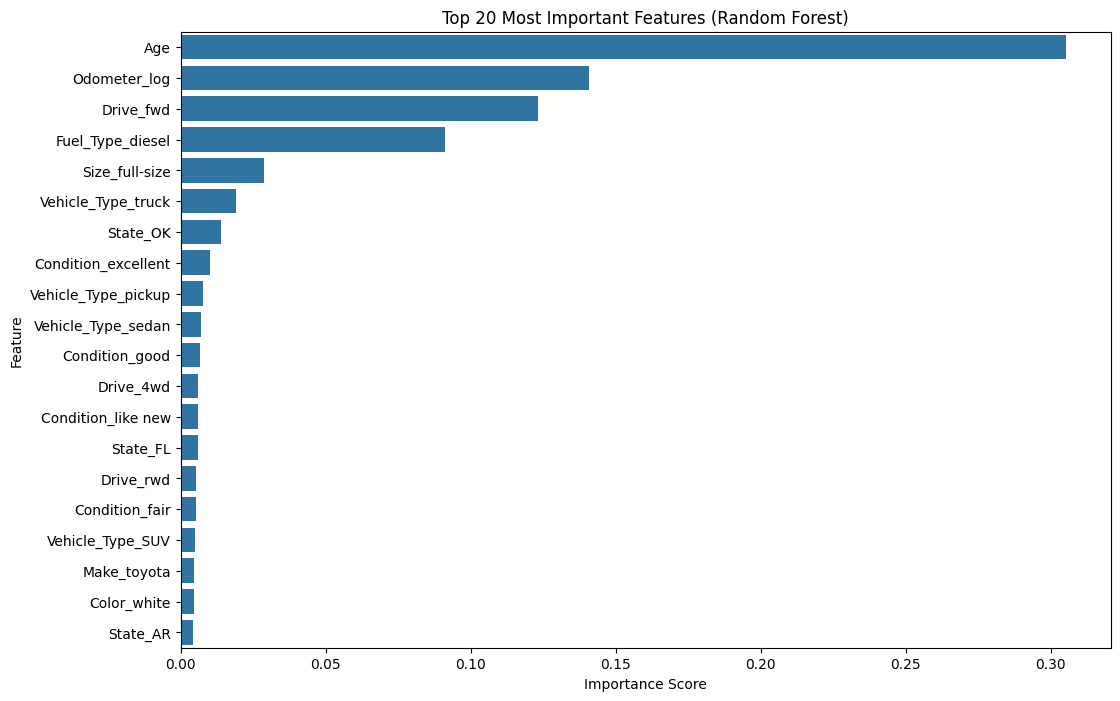

In [51]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get the names of the features (excluding the target variable)
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print the top N most important features
top_n = 20  # You can adjust the number of top features to display
print(f"\nTop {top_n} Most Important Features (Random Forest):")
for i in range(top_n):
    print(f"{i + 1}. {feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]:.4f}")

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[sorted_indices[:top_n]], y=feature_names[sorted_indices[:top_n]])
plt.title(f'Top {top_n} Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**Key Insights for Jason Motors Group:**

**Age is the Dominant Factor:** By far, the age of the vehicle is the most crucial factor in determining its listed price. This aligns with our earlier EDA findings.

**Odometer is Second Most Important:** The mileage (represented by the log-transformed odometer reading) is the next most significant predictor. Higher mileage generally leads to lower prices.

**Drivetrain and Fuel Type Matter:** The type of drive (FWD, 4WD, RWD) and fuel type (especially diesel) are also strong indicators of price. Interestingly, Front-Wheel Drive (FWD) has a high importance score. Diesel vehicles also tend to have different pricing patterns.

**Size and Vehicle Type Influence Price:** The size of the vehicle (full-size) and the overall type (truck, pickup, sedan, SUV) are important factors, reflecting different market demands and utility.

**Condition is a Key Indicator:** The condition rating ("excellent," "good," "like new," "fair") directly impacts the price, as expected.

**Location Plays a Role:** The state in which the car is listed (e.g., OK, FL, AR) has some influence on the price, suggesting regional market variations.

**Make and Color Have Less Direct Impact (in the top 20):** While 'Make_toyota' and 'Color_white' appear in the top 20, their importance scores are relatively lower compared to age and odometer. This doesn't mean they aren't important at all, but other factors have a stronger direct effect according to the model.